# 2量子ビット回路その２
次は、$CNOT$ゲート（$CX$ゲート）の実験を行います。

In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}

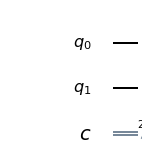

In [3]:
# 2量子ビット回路を用意
q = QuantumCircuit(2,2)    # ２量子ビット回路と２ビットの古典レジスターを用意します。

# 回路を描画
q.draw(output="mpl")

$CNOT$ゲートは、２量子ビットにかかる量子ゲートで、制御ゲートが1のときのみ、目標ゲートの値を反転します。

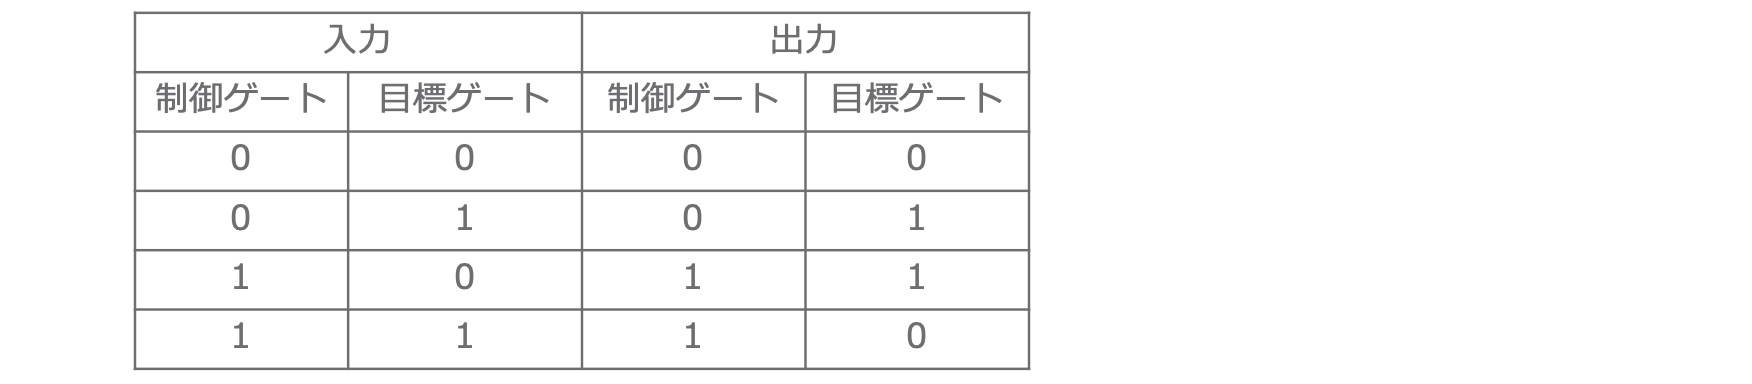

まず、q0とq1が両方とも0の場合を計算してみましょう。

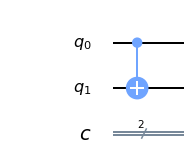

In [4]:
# q0, q1が0の場合
q.cx(0,1)   # CNOTゲートの制御ゲートをq0、目標ゲートをq1にセットします。

# 回路を描画
q.draw(output="mpl")

状態ベクトルシミュレーターを使って計算してみます。

In [5]:
## First, simulate the circuit
## 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
result = job.result().get_statevector(q, decimals=3)

print(result)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


$|00\rangle$ に$CX$ゲートを操作しても$|00\rangle$ のままです。

$ CX_{01} |00\rangle  = |00\rangle $


ここで、$ CX_{01} $の小文字の01は、制御ゲートがq0、目標ゲートがq1を意味します。

(注) [1.+0.j 　0.+0.j 　0.+0.j 　0.+0.j] の見方について：

$|00\rangle$は、$|0\rangle|0\rangle$ なので

$|0\rangle \otimes |0\rangle=\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
\otimes
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
=\begin{pmatrix}
1 \\\
0 \\\
0 \\\
0
\end{pmatrix} 
=
1*\begin{pmatrix}
1 \\\
0 \\\
0 \\\
0
\end{pmatrix} +0*\begin{pmatrix}
0 \\\
1 \\\
0 \\\
0
\end{pmatrix} +0*\begin{pmatrix}
0 \\\
0 \\\
1 \\\
0
\end{pmatrix} +0*\begin{pmatrix}
0 \\\
0 \\\
0 \\\
1
\end{pmatrix} $
$=1*|00\rangle+0*|01\rangle+0*|10\rangle+0*|11\rangle
$ 

[1.+0.j 　0.+0.j 　0.+0.j 　0.+0.j]は、この順番に並んでいます。




次に、$|01\rangle$ に$CX$ゲートを操作します。

ここで、Qiskitでは、最下位ビット(LSB)が右端で、量子情報の教科書とは逆であることに注意してください。つまり、1量子ビット目が一番右のビットで、2量子ビット目が右から２番目のビットです。$|01\rangle$ とは、q0が1で、q1が0を表しています。

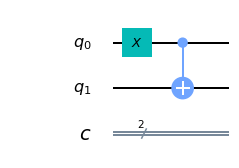

In [6]:
# 2量子ビット回路を用意
q1 = QuantumCircuit(2,2)    # ２量子ビット回路と２ビットの古典レジスターを用意します。

# 回路を描画
q1.draw(output="mpl")

# q0=1, q1=0の場合
q1.x(0)    # q0を1にします。
q1.cx(0,1)   # CNOTゲートの制御ゲートをq0、目標ゲートをq1にセットします。

# 回路を描画
q1.draw(output="mpl")

In [7]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q1, vector_sim )
result = job.result().get_statevector(q1, decimals=3)

print(result)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


$|01\rangle$ に$CX$ゲートを操作すると$|11\rangle$ になりました。

$ CX_{01} |01\rangle  = |11\rangle $

QASMシミュレーターで計算してみましょう。

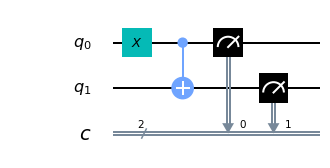

In [9]:
# 回路を測定
q1.measure(0,0)
q1.measure(1,1)

# 回路を描画
q1.draw(output="mpl")

{'11': 1024}


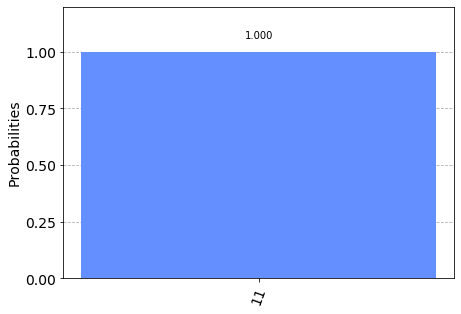

In [10]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(q1, backend=simulator, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(q1)
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

$|11\rangle$の状態が100%測定されます。



時間に余裕がある人は以下を確認してみましょう。

## 演習3

下の式を状態ベクトルシミュレーターで実行し、確認してみましょう。

(1) $ CX_{01} |10\rangle  = |10\rangle $

(2) $ CX_{01} |11\rangle  = |01\rangle $


再掲：ここに注意！

・$ CX_{01} $の小文字の01は、制御ゲートがq0、目標ゲートがq1を意味します。

・Qiskitでは、最下位ビット(LSB)が右端なので、$|01\rangle$ とは、q0が1で、q1が0を表します。